<a href="https://colab.research.google.com/github/Shreya2803/Youtube-Video-Transcript-Summarization/blob/main/Youtube_Video_Transcript_%26_Summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Transcript & Summarize Youtube Video**

Creates line by line transcription of the speakers and also summarize it and the summarization can be downloaded in pdf format.
This project is suitable for transcripting short length youtube videos. Youtube videos with longer duration ( more than 1 hour) will take too much time to transcribe.

**Libraries Used :**
  

1.   Transformers (open-source library developed by Hugging Face)
2.   youtube_transcript_api(fetch the transcripts or closed captions of YouTube videos)
3.   reportlab  (To create pdf)





**Installing Dependencies**

In [50]:
'''
   ---   The library is built on top of the PyTorch and TensorFlow frameworks
   ---   Access and use a variety of pre-trained models like BERT, GPT-3
   ---   Imports the relevant components from the library, such as models, tokenizers, and pipelines, to perform various NLP tasks.
'''
!pip install -q transformers

In [51]:
'''
   ---   This is a python API which allows you to get the transcript/subtitles for a given YouTube video
   ---   works for automatically generated subtitles, supports translating subtitles
   ---    it does not require a headless browser, like other selenium based solutions do
'''
!pip install -q youtube_transcript_api

In [52]:
'''
   ---   open source toolkit for creating PDF documents
   ---  Features:  Flexibility in setting page layout, Support for adding images , Text manipulation
'''
!pip install reportlab


In [54]:
'''
   transformers pipeline for sentiment analysis to analyze the sentiment of the video transcript.
'''
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi


In [55]:
'''
   These classes are used for sequence-to-sequence language modeling tasks, such as text summarization and translation
'''

from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

**BART (Bidirectional and Auto-Regressive Transformers) model for text summarization**

In [56]:
'''
   ---   BART available in the Hugging Face transformers library.
   ---   The code initializes the tokenizer and model using the AutoTokenizer and AutoModelForSeq2SeqLM classes.
   ---   AutoModelForSeq2SeqLM loads the pre-trained model specifically designed for sequence-to-sequence tasks like text summarization.
   ---   This code  initializes the BART tokenizer (tokenizer) and the BART summarization model (summarizer).
'''



model_name = 'facebook/bart-large-cnn'
tokenizer = AutoTokenizer.from_pretrained(model_name)
summarizer = AutoModelForSeq2SeqLM.from_pretrained(model_name)


Youtube Video link

In [57]:
youtube_video = "https://www.youtube.com/watch?v=ukzFI9rgwfU"

extracts the video ID from a YouTube video URL

In [59]:
'''
   ---   It assumes that the video URL is in a specific format where the video ID is present after the "=" character.
   ---   There can be different possible ways a url can be present.
   ---   There should be other possible ways to extract Id (That need to be figured out)
   ---    if there is no "=" character in the URL, this code may result in an IndexError , so validate the URL format before extracting the video ID.
'''

video_id = youtube_video.split("=")[1]

In [60]:
video_id

'ukzFI9rgwfU'

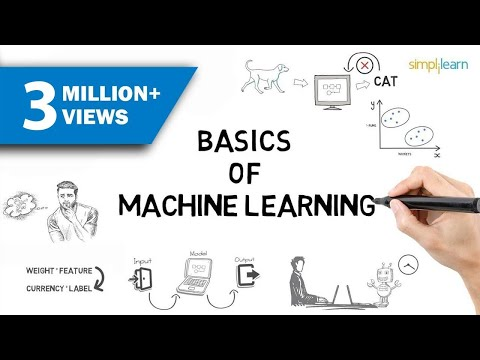

In [61]:
'''
---   It's a convenient way to visualize and interact with YouTube videos within your notebook.
---   To use the YouTubeVideo class, you need to have the IPython package installed.
---    In most Jupyter environments, this package is pre-installed
'''

from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [63]:
'''
   ---   get_transcript() method will return a list of dictionaries, where each dictionary represents a caption segment of the video.
   ---    Each dictionary contains the following keys: 'text', 'start', and 'duration'
   ---   'text'  -  caption, 'start' -  start time of the caption segment in seconds, 'duration'contains the duration of the caption
'''
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)


concatenate all the caption text from the transcript into a single string

In [64]:

result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
print(len(result))

7633


**Generating Summary using BART Tokenizer and summarizer model**

In [65]:
'''
 It uses the BART tokenizer and summarizer model to generate a summary for a long transcript text by breaking it into smaller chunks.
 This approach is useful when the transcript text is too long for the summarizer model to process in one go,
 as some models have limitations on the maximum input length
 After processing all chunks, the code concatenates the individual summaries into a single summarized text
'''

print("Transcribed text:\n")
#break the result text into smaller segments of 1000 characters
num_iters = int(len(result) / 1000)
summarized_text_chunks = []
for i in range(0, num_iters + 1):
    start = i * 1000
    end = (i + 1) * 1000
    print(result[start:end])

    # Tokenize the input text
    inputs = tokenizer(result[start:end], max_length=1024, return_tensors="pt", truncation=True)

    # Generate the summary using the summarizer model
    summary_ids = summarizer.generate(inputs.input_ids, max_length=150, min_length=50, do_sample=False)
    out = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    #print("Summarized text:\n" + out)

    summarized_text_chunks.append(out)

# Concatenate the individual summaries into a single summarized text
final_summarized_text = " ".join(summarized_text_chunks)

print("\nFinal Summarized Text:\n" + final_summarized_text)

Transcribed text:

 we know humans learn from their past experiences and machines follow instructions given by humans but what if humans can train the machines to learn from the past data and do what humans can do and much faster well that's called machine learning but it's a lot more than just learning it's also about understanding and reasoning so today we will learn about the basics of machine learning so that's paul he loves listening to new songs he either likes them or dislikes them paul decides this on the basis of the song's tempo genre intensity and the gender of voice for simplicity let's just use tempo and intensity for now so here tempo is on the x axis ranging from relaxed to fast whereas intensity is on the y axis ranging from light to soaring we see that paul likes the song with fast tempo and soaring intensity while he dislikes the song with relaxed tempo and light intensity so now we know paul's choices let's say paul listens to a new song let's name it as song a song 

In [66]:
transcribed_text_length = len(result)
print("Length of the Transcribed Text:", transcribed_text_length)

Length of the Transcribed Text: 7633


In [67]:
summarized_text_length=len(str(summarized_text))
print("Length of the Transcribed Text:", summarized_text_length)

Length of the Transcribed Text: 2731


In [68]:
str(summarized_text)

'["Germany\'s car industry is a vital part of its economy with links to government that go back decades. The industry has proved of Bellwether for the country\'s future prospects too since the 70s car exports have risen with Germany\'s wealth and influence manufacturing.", "German car makers are now playing catch-up after over half a century of global dominance. In 2000 seven of the world\'s most valuable companies were German but in the past two decades that number has fallen to just three. Almost half of Germany\'s GDP comes from exports cars make up the biggest proportion.", "In 1998 German trade with China was worth 16 billion dollars now it\'s worth over 180 billion. There\'s a fear that Germany could have become too reliant on the Chinese market. There is a strong sense that Germany\'s China policy is going to have to be recalibrated.", \'Two-thirds of German businesses said they still regularly used a fax machine. Only one in three German companies have a central digital strateg

**Creates PDF for Summarized text and transcribed text**

In [69]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

def write_text_to_pdf(file_path, text):
    c = canvas.Canvas(file_path, pagesize=letter)
    width, height = letter

    # Set the font and font size
    c.setFont("Helvetica", 12)

    # Set the margins and position to write the text
    left_margin = 50
    top_margin = height - 50
    line_height = 14
    max_line_length = width - left_margin * 2

    # Split the text into lines to fit within the page width
    lines = text.split("\n")
    y_position = top_margin

    for line in lines:
        words = line.split(" ")
        line_to_draw = words[0]
        for word in words[1:]:
            if c.stringWidth(line_to_draw + " " + word) < max_line_length:
                line_to_draw += " " + word
            else:
                c.drawString(left_margin, y_position, line_to_draw)
                y_position -= line_height
                line_to_draw = word

        c.drawString(left_margin, y_position, line_to_draw)
        y_position -= line_height

    c.save()

write_text_to_pdf("Transcript.pdf", result)
write_text_to_pdf("Summary.pdf", final_summarized_text)
